# Dimensionality Reduction & PCA Lab Notebook

By the end of this lab you will review:
- Linear Algebra, Cosine similarity, & Eigen-Vectors
- Principal Component Analysis
- Implementation of PCA through sklearn

## Linear Algebra Refresher & Bottom-Up Concepts

In this section we review basic vector operations. We will create vectors representing basketball players’ statistics and compute their magnitudes, dot product, and cosine similarity.

In [56]:
import numpy as np

# Define vectors for two basketball players' statistics
# [pointspergame, assistspergame]
player1 = np.array([25, 20])
player2 = np.array([15.59, 1.17])

The code above imports numpy and creates two NumPy arrays `player1` and `player2`, each representing statistics (points, assists) for two basketball players. This sets up the data for subsequent vector operations.

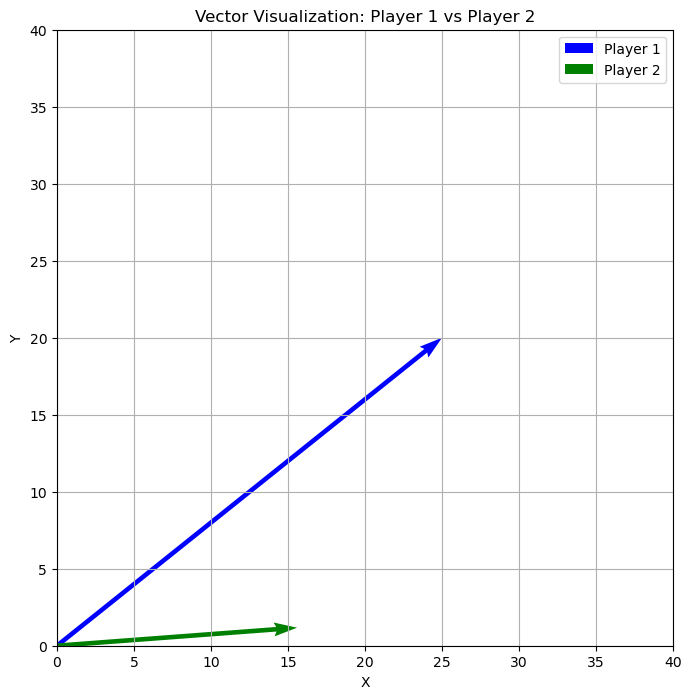

In [57]:
import matplotlib.pyplot as plt

# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

#pPlot the origin
origin = [0], [0]  

# plot vectors
ax.quiver(*origin, player1[0], player1[1], color='blue', scale=1, scale_units='xy', angles='xy', label='Player 1')
ax.quiver(*origin, player2[0], player2[1], color='green', scale=1, scale_units='xy', angles='xy', label='Player 2')

# set limits and grid
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Visualization: Player 1 vs Player 2')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

In [58]:
# we can utilize vector addition
player1 + player2

array([40.59, 21.17])

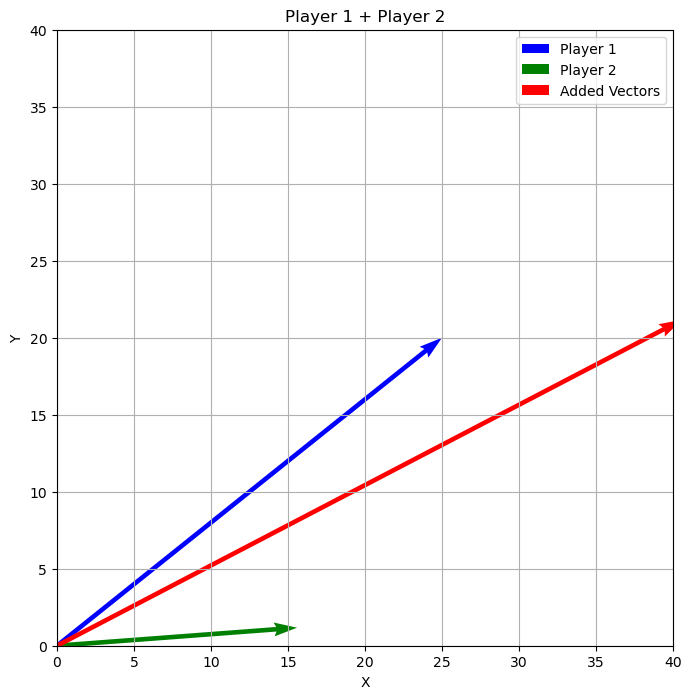

In [59]:
sum_vect = player1 + player2

# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# plot vectors
ax.quiver(*origin, player1[0], player1[1], color='blue', scale=1, scale_units='xy', angles='xy', label='Player 1')
ax.quiver(*origin, player2[0], player2[1], color='green', scale=1, scale_units='xy', angles='xy', label='Player 2')
ax.quiver(*origin, sum_vect[0], sum_vect[1], color='red', scale=1, scale_units='xy', angles='xy', label='Added Vectors')

# set limits and grid
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Player 1 + Player 2')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

In [60]:
# as well as vector subtraction
player1 - player2

array([ 9.41, 18.83])

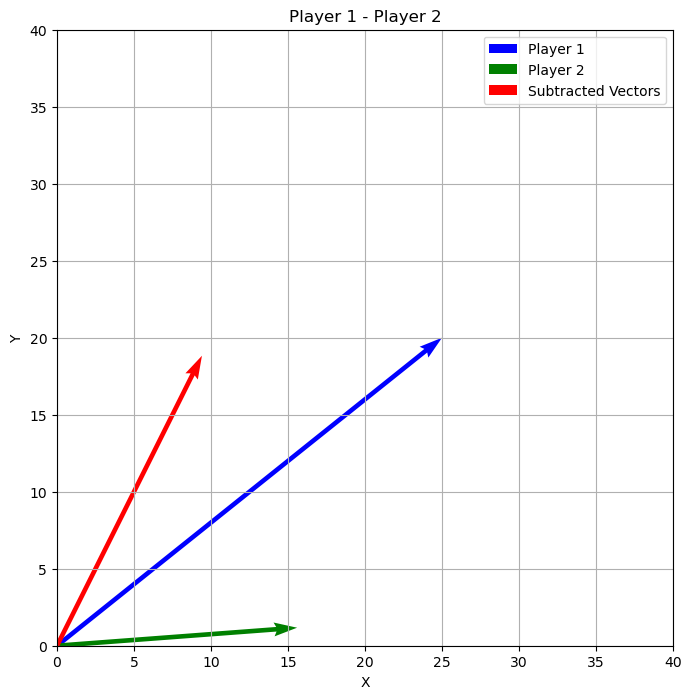

In [61]:
sub_vect = player1 - player2

# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

#pPlot the origin
origin = [0], [0]  

# plot vectors
ax.quiver(*origin, player1[0], player1[1], color='blue', scale=1, scale_units='xy', angles='xy', label='Player 1')
ax.quiver(*origin, player2[0], player2[1], color='green', scale=1, scale_units='xy', angles='xy', label='Player 2')
ax.quiver(*origin, sub_vect[0], sub_vect[1], color='red', scale=1, scale_units='xy', angles='xy', label='Subtracted Vectors')

# set limits and grid
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Player 1 - Player 2')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

In [62]:
# and scalar multiplication
2 * player2

array([31.18,  2.34])

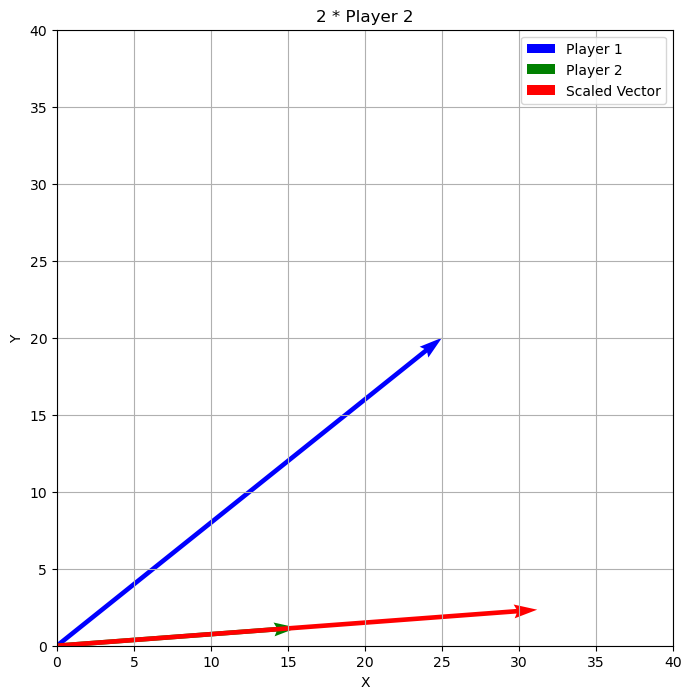

In [63]:
scaled_vector = 2 * player2

# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

#pPlot the origin
origin = [0], [0]  

# plot vectors
ax.quiver(*origin, player1[0], player1[1], color='blue', scale=1, scale_units='xy', angles='xy', label='Player 1')
ax.quiver(*origin, player2[0], player2[1], color='green', scale=1, scale_units='xy', angles='xy', label='Player 2')
ax.quiver(*origin, scaled_vector[0], scaled_vector[1], color='red', scale=1, scale_units='xy', angles='xy', label='Scaled Vector')

# set limits and grid
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2 * Player 2')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

In [64]:
# we can also calculate the Euclidean norms (magnitudes) of each vector
norm_player1 = np.sqrt(player1[0] ** 2 + player1[1] ** 2)

norm_player1

np.float64(32.01562118716424)

In [65]:
# while it's good to understand the underlying components of equations, we can also simply use numpy methods
np.linalg.norm(player1)

np.float64(32.01562118716424)

In [66]:
# and as we identified before, we can calculate the dot product of the two vectors
dot_product = player1[0] * player2[0] + player1[1] * player2[1]

dot_product

np.float64(413.15)

In [67]:
np.dot(player1, player2)

np.float64(413.15)

Let's identify how we can calculate the similarity between two vectors (aka players) by calculating their cosine similarity. This will entail the following steps:

1. Compute the dot product of `player1` and `player2` using `np.dot`.
2. Calculate the Euclidean norm (or magnitude) of each vector using `np.linalg.norm`.
3. Divide the dot product by the product of the norms.

The printed outputs will display the cosine similarity value. 

In [68]:
# 1. compute the dot product of the two vectors
dot_product = np.dot(player1, player2)

# 2. compute the Euclidean norms (magnitudes) of each vector
norm_player1 = np.linalg.norm(player1)
norm_player2 = np.linalg.norm(player2)

# 3. calculate cosine similarity between the two players
cosine_similarity = dot_product / (norm_player1 * norm_player2)

print('Cosine Similarity:', cosine_similarity)

Cosine Similarity: 0.825429754171391


This gives us a measure between -1 and 1. We consider similar and opposite vectors (1 & -1 respectively) to be "similar", even if they travel in opposite directions. However we consider cosine similarity close to 0 to indicate "opposite" vectors. We can convert these values into radians by using `arrccos`. 

In [69]:
np.arccos(cosine_similarity)

np.float64(0.599833256015589)

Let's formalize these steps into a function so that we can re-use this similarity metric for a variety of different vectors (aka players).

In [70]:
# implement the cosine-similarity function
def cosine_sim(vector1, vector2):
    dot_product = np.dot(vector1, vector2)

    # 2. compute the Euclidean norms (magnitudes) of each vector
    norm_player1 = np.linalg.norm(vector1)
    norm_player2 = np.linalg.norm(vector2)

    # 3. calculate cosine similarity between the two players
    return dot_product / (norm_player1 * norm_player2)

In [71]:
# let's see what the cosine similarity is between player1 & player3
player3 = np.array([18.62, 6.12])
cos_sim = cosine_sim(player1, player3)
cos_sim

np.float64(0.9368846736238657)

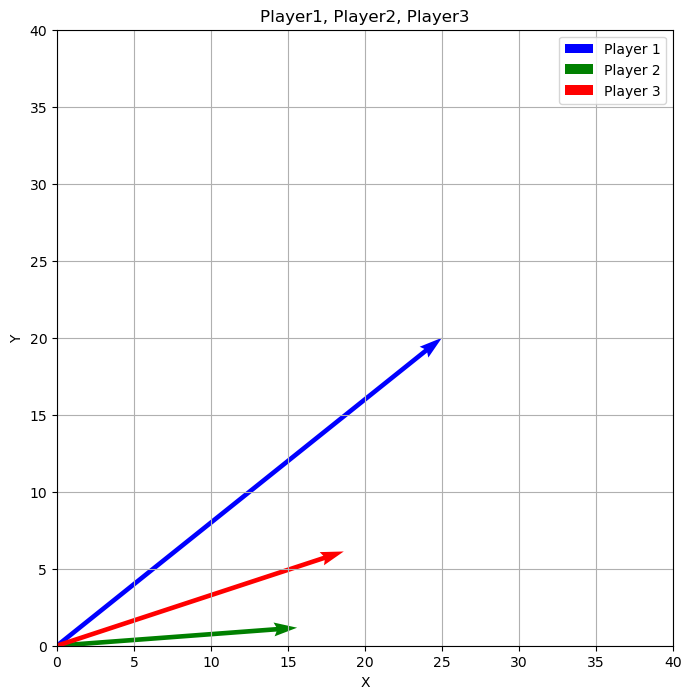

In [72]:
# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

#pPlot the origin
origin = [0], [0]  

# plot vectors
ax.quiver(*origin, player1[0], player1[1], color='blue', scale=1, scale_units='xy', angles='xy', label='Player 1')
ax.quiver(*origin, player2[0], player2[1], color='green', scale=1, scale_units='xy', angles='xy', label='Player 2')
ax.quiver(*origin, player3[0], player3[1], color='red', scale=1, scale_units='xy', angles='xy', label='Player 3')

# set limits and grid
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Player1, Player2, Player3')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

In [73]:
np.arccos(cos_sim)

np.float64(0.35718526480215246)

Notice that `player3` & `player1` have a cosine similarity close to `1`. This indicates that these players are more similar in performance. Let's explore the other types of cosine similarities.

In [74]:
# let's imagine we have a player who is the exact opposite of player2. They make roughly 1 point per game, but 15 assists per game (notice this is the reverse of player2's stats)
player4 = np.array([1.17, 15])
cos_sim = cosine_sim(player2, player4)
cos_sim

np.float64(0.1521567606951529)

In [75]:
np.arccos(cos_sim)

np.float64(1.418046249649611)

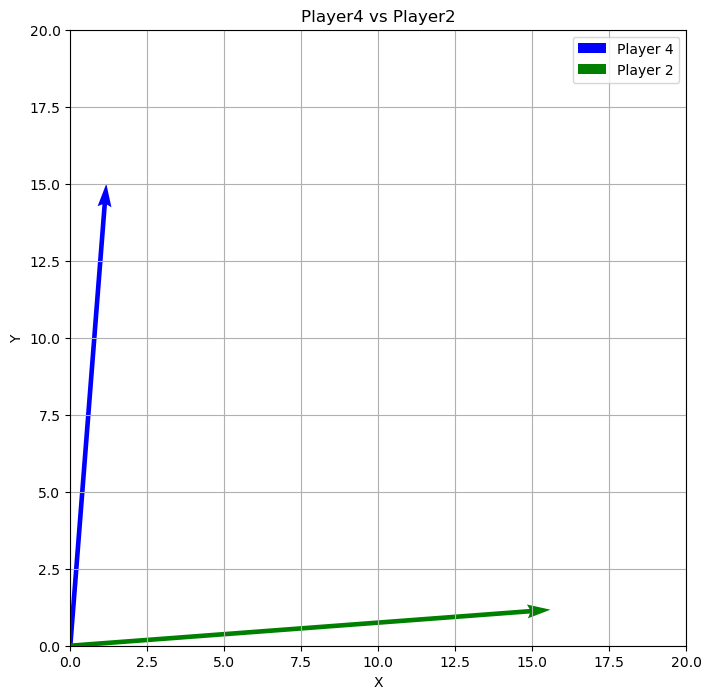

In [76]:
# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

#pPlot the origin
origin = [0], [0]  

# plot vectors
ax.quiver(*origin, player4[0], player4[1], color='blue', scale=1, scale_units='xy', angles='xy', label='Player 4')
ax.quiver(*origin, player2[0], player2[1], color='green', scale=1, scale_units='xy', angles='xy', label='Player 2')

# set limits and grid
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Player4 vs Player2')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

Notice that orthoganlity better describes opposite performance as opposed to vectors that go in the complete opposite direction. Think of it this way, while player2 has greatest variance in the X direction, player4 has the greatest variance in the Y direction. 

## PCA Calculation - Data Standardization and Covariance Matrix

This section focuses on centering the data through standardization and computing the covariance matrix. As outlined in the slides, this step is crucial before applying PCA.

In [77]:
import pandas as pd

# load the basketball dataset into a DataFrame
team1 = [
    [18.72, 3.38],
    [22.88, 7.97],
    [20.07, 5.11],
    [25.0, 20.0],
    [18.62, 6.12],
    [15.59, 1.17]
]

# convert to DataFrame
df = pd.DataFrame(team1, columns=['PointsPerGame', 'AssistsPerGame'])

df.head()

,PointsPerGame,AssistsPerGame
0,18.72,3.38
1,22.88,7.97
2,20.07,5.11
3,25.00,20.00
4,18.62,6.12


C:\Users\saidmf\AppData\Local\Temp\ipykernel_25368\752414344.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(df))


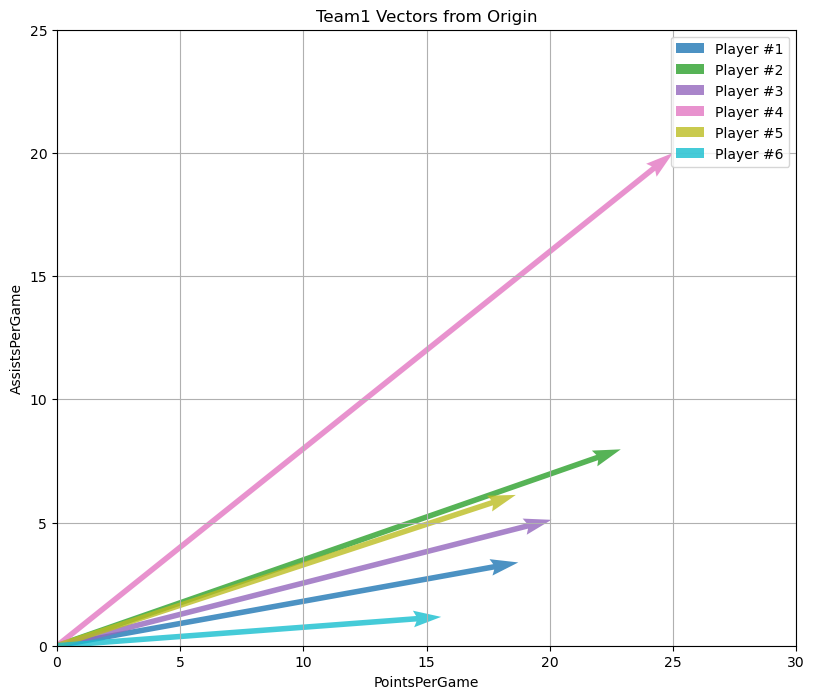

In [78]:
import matplotlib.cm as cm

plt.figure(figsize=(12, 8))
ax = plt.gca()
colors = cm.get_cmap('tab10', len(df))

# plot each vector from origin
for idx, row in df.iterrows():
    ax.quiver(0, 0, row['PointsPerGame'], row['AssistsPerGame'], angles='xy', scale_units='xy', scale=1, color=colors(idx), alpha=0.8, label=f'Player #{idx+1}')

# Formatting
plt.xlim(0, df['PointsPerGame'].max() + 5)
plt.ylim(0, df['AssistsPerGame'].max() + 5)
plt.xlabel("PointsPerGame")
plt.ylabel("AssistsPerGame")
plt.title("Team1 Vectors from Origin")
plt.grid(True)
plt.legend()
ax.set_aspect('equal')

# Show plot
plt.show()

Step 1: Before moving forward, we must standardize this dataset around 0 by subtracting the average off of each sample.

In [79]:
# standardize the numeric columns of the dataset
standardized_df = df - df.mean()
standardized_df.head()

,PointsPerGame,AssistsPerGame
0,-1.426667,-3.911667
1,2.733333,0.678333
2,-0.076667,-2.181667
3,4.853333,12.708333
4,-1.526667,-1.171667


C:\Users\saidmf\AppData\Local\Temp\ipykernel_25368\1466950296.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(df))


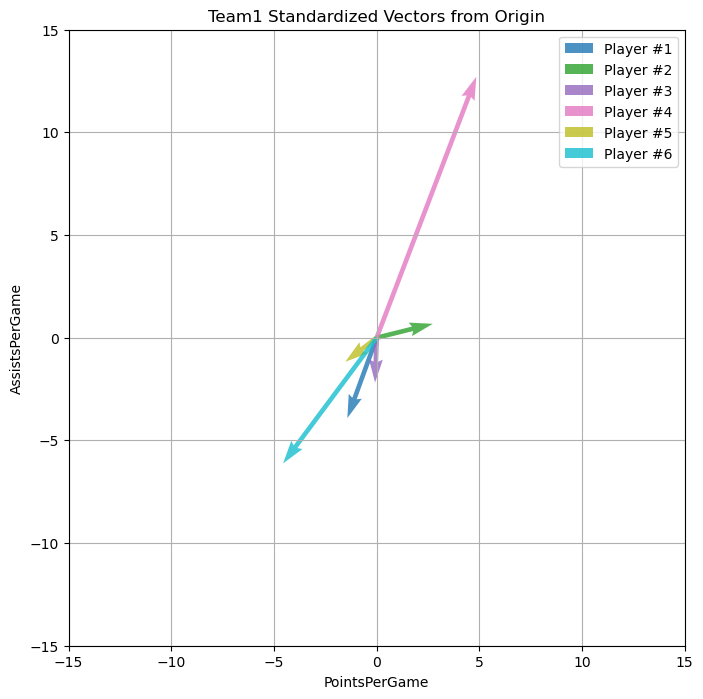

In [80]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
colors = cm.get_cmap('tab10', len(df))

# plot each vector from origin
for idx, row in standardized_df.iterrows():
    ax.quiver(0, 0, row['PointsPerGame'], row['AssistsPerGame'], angles='xy', scale_units='xy', scale=1, color=colors(idx), alpha=0.8, label=f'Player #{idx+1}')

# Formatting
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel("PointsPerGame")
plt.ylabel("AssistsPerGame")
plt.title("Team1 Standardized Vectors from Origin")
plt.grid(True)
plt.legend()
ax.set_aspect('equal')

# Show plot
plt.show()

The above cell standardizes the numeric features in the dataset. For each column, it subtracts the mean. This re-centers the data around zero. The result is displayed using `head()`.

Step 2: We then calculate the covariance matrix.

In [81]:
# Compute the covariance matrix of the standardized data
cov_matrix = standardized_df.cov()
cov_matrix

,PointsPerGame,AssistsPerGame
PointsPerGame,11.232227,19.792587
AssistsPerGame,19.792587,44.174057


In [82]:
cov_matrix.iloc[0, 0]

np.float64(11.232226666666666)

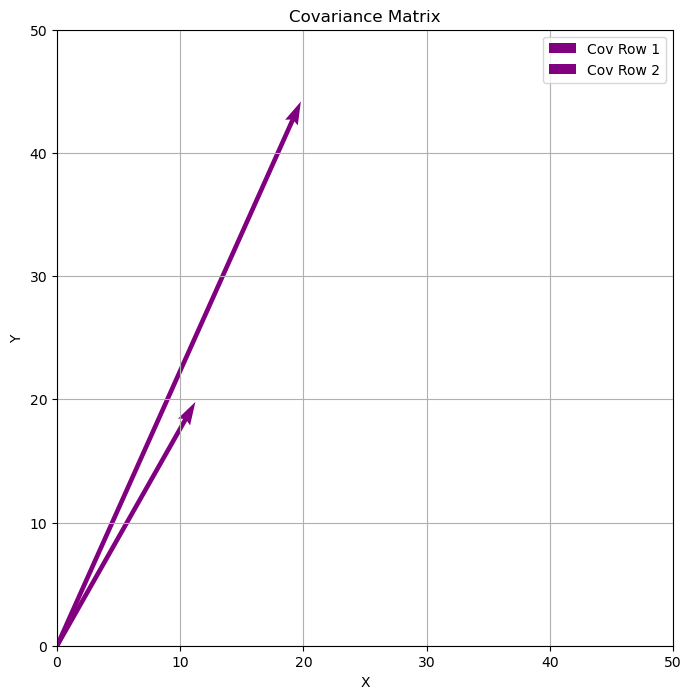

In [83]:
# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

#pPlot the origin
origin = [0], [0]  

# plot vectors
ax.quiver(*origin, cov_matrix.iloc[0, 0], cov_matrix.iloc[0, 1], color='purple', scale=1, scale_units='xy', angles='xy', label='Cov Row 1')
ax.quiver(*origin, cov_matrix.iloc[1, 0], cov_matrix.iloc[1, 1], color='purple', scale=1, scale_units='xy', angles='xy', label='Cov Row 2')

# set limits and grid
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Covariance Matrix')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

This code calculates the covariance matrix for the standardized numerical features using the pandas `cov()` function. The covariance matrix shows how different features vary together, which is a key preparatory step for PCA.

## PCA Calculation - Getting Eigenvectors

In this section we manually implement PCA using numpy. We will compute the eigenvalues and eigenvectors of the covariance matrix, sort them, and project the data onto the principal component.

In [84]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix.values)

print('Eigenvalues:', eigenvalues)
print('Eigenvectors:', eigenvectors)

Eigenvalues: [ 1.95362657 53.45265677]
Eigenvectors: [[-0.90544443 -0.42446482]
 [ 0.42446482 -0.90544443]]


This cell uses numpy's `linalg.eig` function to perform eigen decomposition on the covariance matrix. The resulting eigenvalues indicate the amount of variance captured by each principal component, while the eigenvectors provide the direction of these components.

In [85]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted eigenvectors", sorted_eigenvectors)

Sorted eigenvectors [[-0.42446482 -0.90544443]
 [-0.90544443  0.42446482]]


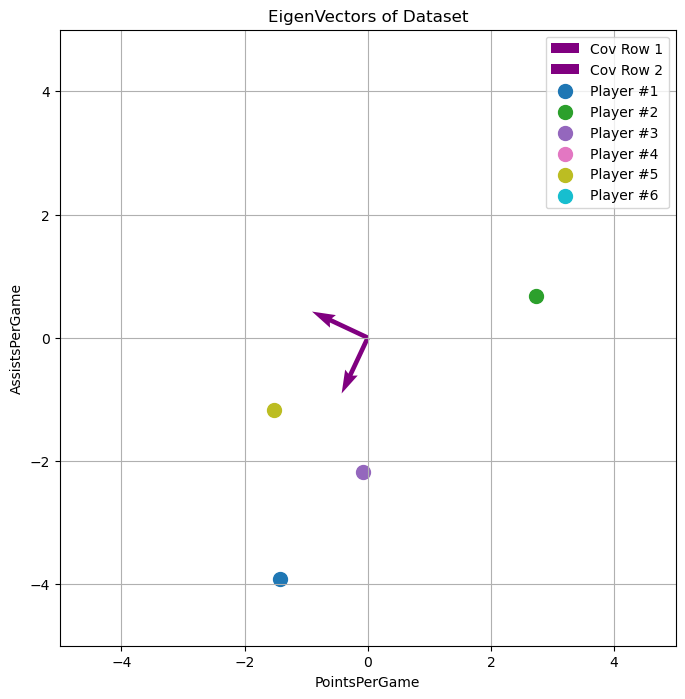

In [86]:
# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# plot eigen-vectors
ax.quiver(*origin, sorted_eigenvectors[0][0], sorted_eigenvectors[0][1], color='purple', scale=1, scale_units='xy', angles='xy', label='Cov Row 1')
ax.quiver(*origin, sorted_eigenvectors[1][0], sorted_eigenvectors[1][1], color='purple', scale=1, scale_units='xy', angles='xy', label='Cov Row 2')

# plot original points
for idx, row in standardized_df.iterrows():
    plt.scatter(row['PointsPerGame'], row['AssistsPerGame'], color=colors(idx), s=100, label=f'Player #{idx+1}')

# Formatting
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# set limits and grid
plt.xlabel('PointsPerGame')
plt.ylabel('AssistsPerGame')
plt.title('EigenVectors of Dataset')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# show plot
plt.show()

We consider the eigenvector with the largest eigenvalue to explain the most variance in our dataset. In this case, we can state that the first eigenvector explains 96% of variance in our dataset! Therefore, if we take the dot product of our first eigenvector & the dataset, we can express our data in just one dimension and still retain 96% of information.

In [87]:
# Project the standardized data onto the first principal component
pc1 = np.dot(standardized_df.values, sorted_eigenvectors[:, 0])

print('Projection onto first principal component:', pc1)

Projection onto first principal component: [  4.14736661  -1.77439698   2.00792023 -13.56675889   1.70889535
   7.47697369]


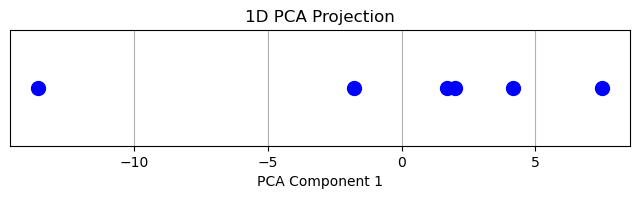

In [88]:
plt.figure(figsize=(8, 1.5))
plt.scatter(pc1, np.zeros_like(pc1), c='blue', s=100) 
plt.yticks([])
plt.xlabel("PCA Component 1")
plt.title("1D PCA Projection")
plt.grid(True)
plt.show()

This cell projects the standardized data onto the first principal component by taking the dot product of the data matrix with the eigenvector associated with the largest eigenvalue. The output shows the projected values, illustrating how the original multidimensional data is reduced onto a single axis representing maximum variance.

## PCA with Scikit-learn and Data Visualization

In this section we transition to using sklearn's PCA for dimensionality reduction and visualize the results. Let's see how we can extract better predictive capabilities on a highly dimensional dataset that contains 400 images of 40 different faces.

In [89]:
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [90]:
faces = datasets.fetch_olivetti_faces()

X = faces.images
y = faces.target

In [91]:
X.shape

(400, 64, 64)

Each image is a 64 x 64 pixel grid. Each value expresses a normalized [gray-level value](https://en.wikipedia.org/wiki/Grayscale). Let's visualize what the first image looks like, and view its' respective class value.

In [92]:
X[0].shape

(64, 64)

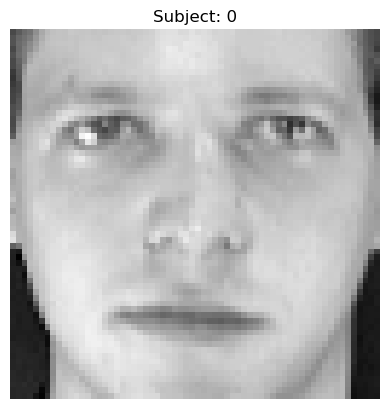

In [93]:
plt.imshow(X[0], cmap='gray')
plt.title(f"Subject: {y[0]}")
plt.axis('off')
plt.show()

Let's take a look at a few more faces.

<Figure size 1600x600 with 0 Axes>

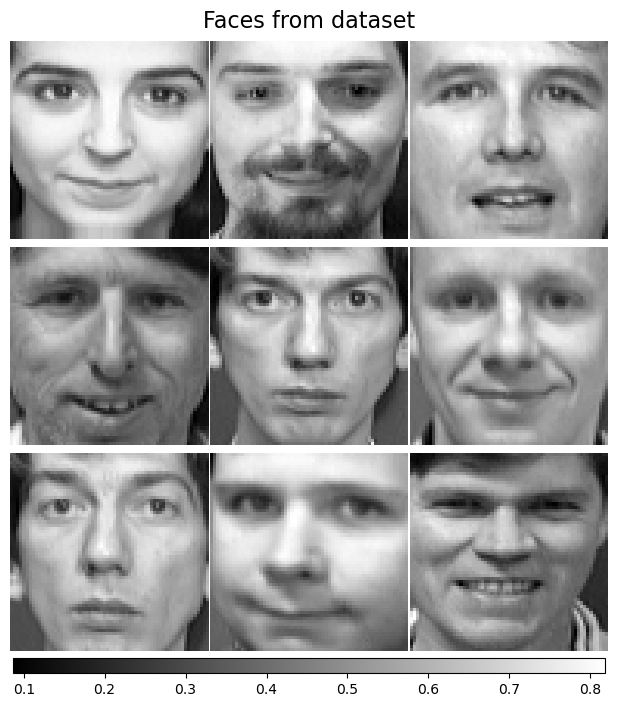

In [94]:
plt.figure(figsize=(16, 6))

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

random_indices = np.random.choice(X.shape[0], n_components, replace=False)
sampled_faces = X[random_indices]

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)

    for ax, vec in zip(axs.flat, images):
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap='gray',
            interpolation="nearest"
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

plot_gallery("Faces from dataset", sampled_faces)

Let's see how a basic knn-classifier functions on this raw dataset. First we need to "flatten" this dataset by expreesing each 64 x 64 grid as an array of 4096 predictors.

In [95]:
# flatten the file
X_flat = faces.images.reshape((len(faces.images), -1))  # flatten to (n_samples, n_features)

X_flat.shape

(400, 4096)

Now we can take our typical steps of creating a train/test split and tuning a model. 

In [96]:
y = faces.target

# train a knn classifier
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)
X_train.shape

(280, 4096)

In [97]:
# implement random-search on the knn model to find best hyperparams
params = {
    "n_neighbors": range(5, 100, 5),
    "weights": ["uniform", "distance"],
    "metric": ["cityblock", "cosine", "euclidean", "minkowski"]
}

knn = KNeighborsClassifier()

# set up GridSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=params, cv=5, random_state=5)

# fit this model on your training data
random_search.fit(X_train, y_train)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['cityblock', 'cosine',
                                                   'euclidean', 'minkowski'],
                                        'n_neighbors': range(5, 100, 5),
                                        'weights': ['uniform', 'distance']},
                   random_state=5)

In [98]:
# extract the best estimator
best_knn = random_search.best_estimator_

# predict on testing data
yhat = best_knn.predict(X_test)

# evaluate its accuracy
confusion_mat = confusion_matrix(yhat, y_test)
class_report = classification_report(yhat, y_test)
accuracy = accuracy_score(yhat, y_test)

print("Accuracy Score\n",accuracy)
print("Confusion Matrix\n", confusion_mat)
print("Classification Report\n", class_report)

Accuracy Score
 0.8083333333333333
Confusion Matrix
 [[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 1]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 2]]
Classification Report
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         2
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00    

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saidmf\anaco

Without any dimension decomposition, we achieve an accuracy of ~80%. Let's visualize which faces we predict accurately and which faces we're misclassifying.

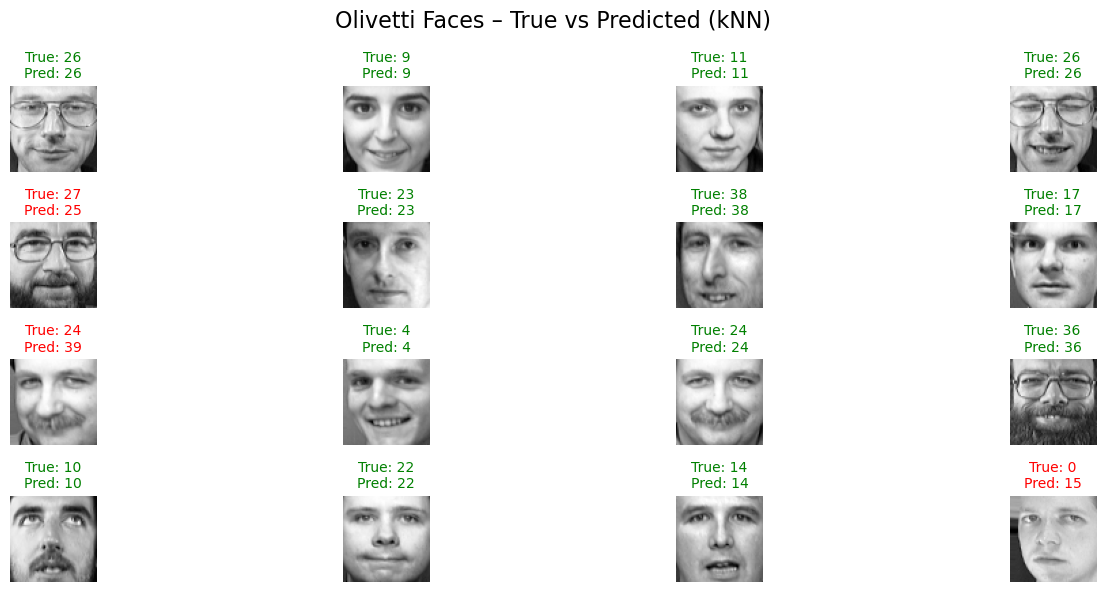

In [99]:
X_images = faces.images

_, _, _, _, _, idx_test = train_test_split(
    X_flat, faces.target, np.arange(len(faces.images)),
    test_size=0.3, random_state=42
)

# Step 2: Visualize predictions with true labels
n_samples_to_plot = 16
sample_idxs = np.random.choice(len(yhat), n_samples_to_plot, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_idxs):
    img = X_images[idx_test[idx]]
    true_label = y_test[idx]
    pred_label = yhat[idx]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Olivetti Faces – True vs Predicted (kNN)", fontsize=16)
plt.tight_layout()
plt.show()


While we cannot visualize 4096 dimensions, we can peek into the bivariate relationship of two different pixels to check if data is "resting" at some lower-dimensional manifold.

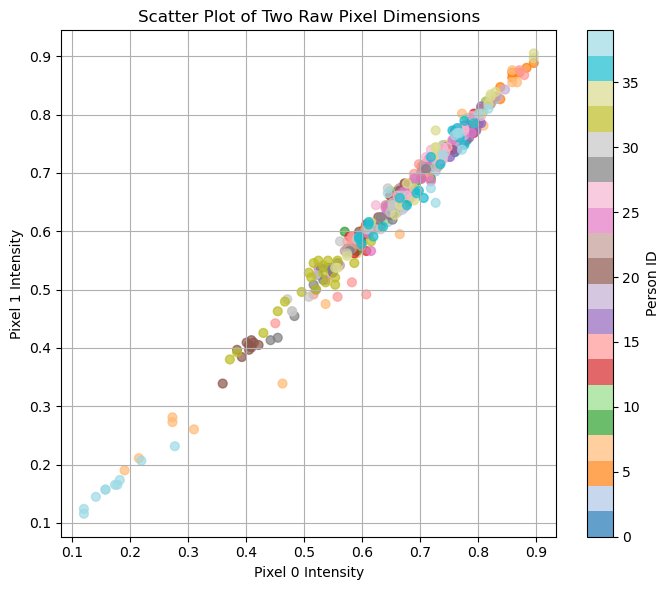

In [100]:
x1 = X_flat[:, 50]   # 50th pixel (starting from top-left corner)
x2 = X_flat[:, 51]   # pixel to the immediate right of the 50th

# Scatter plot
plt.figure(figsize=(7, 6))
scatter = plt.scatter(x1, x2, c=y, cmap='tab20', s=40, alpha=0.7)
plt.xlabel("Pixel 0 Intensity")
plt.ylabel("Pixel 1 Intensity")
plt.title("Scatter Plot of Two Raw Pixel Dimensions")
plt.grid(True)
plt.colorbar(scatter, label="Person ID")
plt.tight_layout()
plt.show()

Amazing! It appears that we could potentially decompose these dimensions into a lower-dimensional space that minimizes variance and potentially provides better predictive capabilites. Let's try PCA out.

First, let's visualize the most "important" components of our faces.

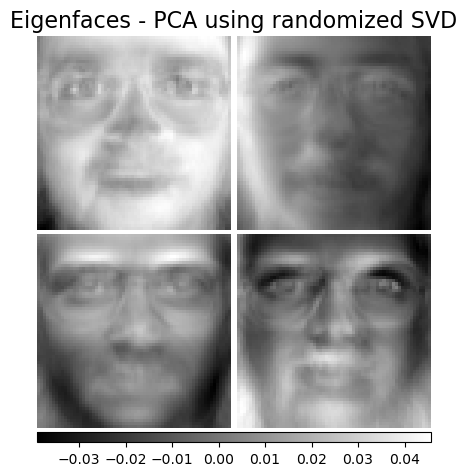

In [101]:
from sklearn.decomposition import PCA

# initialize PCA to reduce data to 4 components for visualization
pca_estimator = PCA(n_components=4, svd_solver="randomized", whiten=True)

pca_estimator.fit(X_flat)
plot_gallery("Eigenfaces - PCA using randomized SVD", pca_estimator.components_, 2, 2)

It appears that our PCA components are honing in on on the presence of glasses, a nose, eyes, and a mouth. We call this an [eigenface](https://en.wikipedia.org/wiki/Eigenface). Let's see if reducing our faces to these basic components result in better prediction.

In [102]:
# create 100 components using PCA
pca = PCA(n_components=100)

# convert our predictors variables to 2 basic components
X_pca = pca.fit_transform(X_flat)

# split into train & testing data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train.shape

(280, 100)

Amazing! We've decomposed 4096 dimensions into 100 predictors.

In [103]:
# implement random-search on the knn model to find best hyperparams
params = {
    "n_neighbors": range(5, 100, 5),
    "weights": ["uniform", "distance"],
    "metric": ["cityblock", "cosine", "euclidean", "minkowski"]
}

knn = KNeighborsClassifier()

# set up GridSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=params, cv=5, random_state=5)

# fit this model on your training data
random_search.fit(X_train, y_train)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['cityblock', 'cosine',
                                                   'euclidean', 'minkowski'],
                                        'n_neighbors': range(5, 100, 5),
                                        'weights': ['uniform', 'distance']},
                   random_state=5)

In [104]:
# extract the best estimator
best_knn = random_search.best_estimator_

# predict on testing data
yhat = best_knn.predict(X_test)

# evaluate its accuracy
confusion_mat = confusion_matrix(yhat, y_test)
class_report = classification_report(yhat, y_test)
accuracy = accuracy_score(yhat, y_test)

print("Accuracy Score\n",accuracy)
print("Confusion Matrix\n", confusion_mat)
print("Classification Report\n", class_report)

Accuracy Score
 0.8666666666666667
Confusion Matrix
 [[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 1]
 [0 0 0 ... 0 7 0]
 [2 0 0 ... 0 0 3]]
Classification Report
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.75      0.75      0.75         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.25      1.00      0.40         2
           8       1.00      0.67      0.80         3
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00    

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


With dimension decomposition, we get an accuracy of ~88%. A clear sign of improvement!

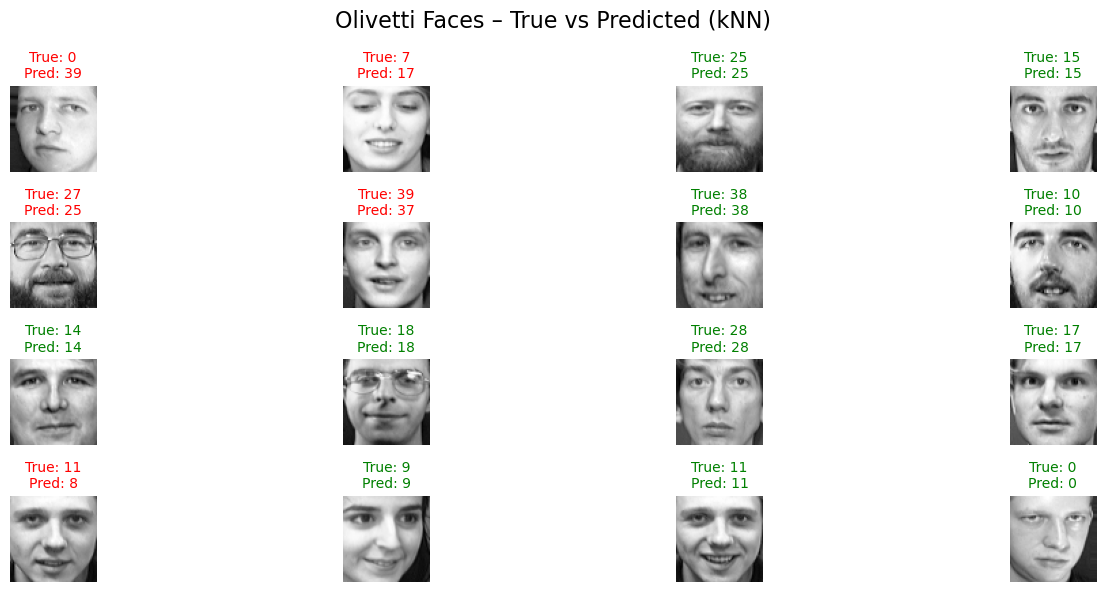

In [105]:
X_images = faces.images

_, _, _, _, _, idx_test = train_test_split(
    X_flat, faces.target, np.arange(len(faces.images)),
    test_size=0.3, random_state=42
)

# Step 2: Visualize predictions with true labels
n_samples_to_plot = 16
sample_idxs = np.random.choice(len(yhat), n_samples_to_plot, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_idxs):
    img = X_images[idx_test[idx]]
    true_label = y_test[idx]
    pred_label = yhat[idx]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Olivetti Faces – True vs Predicted (kNN)", fontsize=16)
plt.tight_layout()
plt.show()


Let's visualize what our new principal components look like in our dataset.

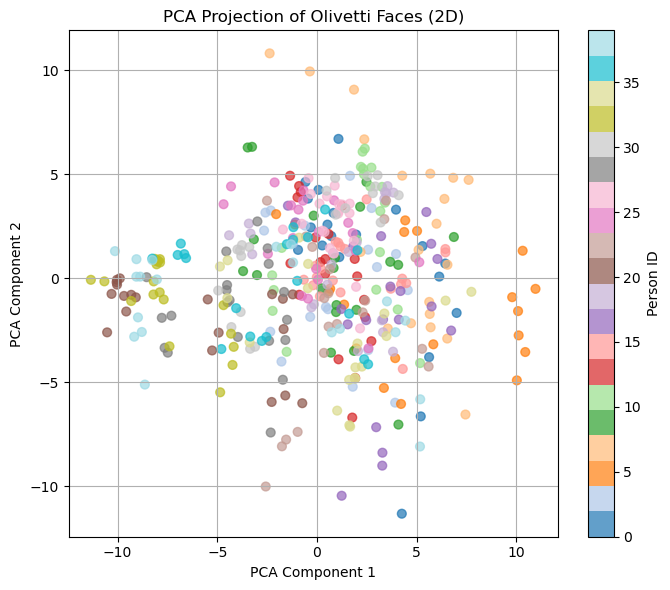

In [106]:
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab20', s=40, alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Olivetti Faces (2D)")
plt.grid(True)
plt.colorbar(scatter, label="Person ID")
plt.tight_layout()
plt.show()

Notice that this scatter plot displays a dataset that utilizes the full "breadth" of the scatterplot, whereas the previous scatter plot displayed data that fell onto a lower manifold.

## Exploring Alternative Dimensionality Reduction Techniques

Keep in mind PCA is not the only dimension decomposition technique! There is also..
* t-SNE: useful for visualizing high-dimensional data in a non-linear way: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding 
* ICA: useful for capturing non-gaussian signals, and used in time series analysis: https://en.wikipedia.org/wiki/Independent_component_analysis
* MiniBatchKMeans: computationally efficient algorithm which can be used for online machine-learning: https://en.wikipedia.org/wiki/K-means_clustering

### T-SNE

In [107]:
from sklearn.manifold import TSNE

# Initialize t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

X_tsne = tsne.fit_transform(X_flat)
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

# set up GridSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=params, cv=5, random_state=5)
# fit this model on your training data
random_search.fit(X_train, y_train)
# extract the best estimator
best_knn = random_search.best_estimator_
# predict on testing data
yhat = best_knn.predict(X_test)
# evaluate its accuracy
accuracy = accuracy_score(yhat, y_test)

print("Accuracy Score\n",accuracy)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy Score
 0.85


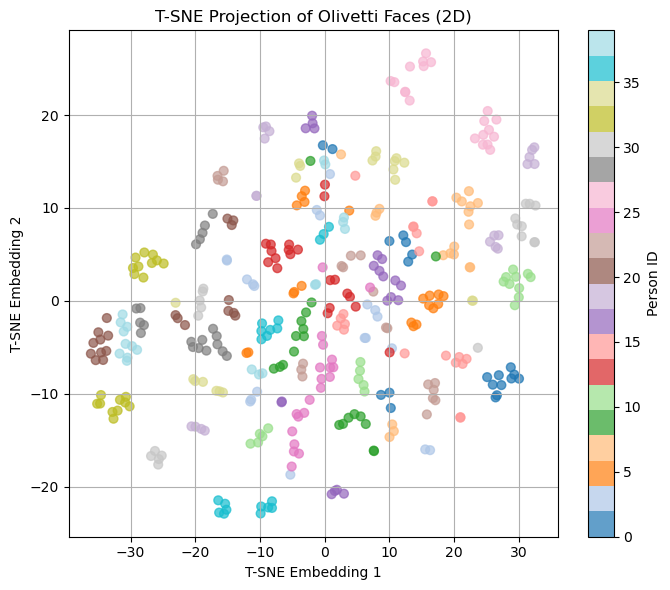

In [111]:
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab20', s=40, alpha=0.7)
plt.xlabel("T-SNE Embedding 1")
plt.ylabel("T-SNE Embedding 2")
plt.title("T-SNE Projection of Olivetti Faces (2D)")
plt.grid(True)
plt.colorbar(scatter, label="Person ID")
plt.tight_layout()
plt.show()

### ICA

In [112]:
from sklearn.decomposition import FastICA

# Initialize t-SNE to reduce data to 2 dimensions
ica = FastICA(n_components=100, random_state=42)

X_ica  = tsne.fit_transform(X_flat)
X_train, X_test, y_train, y_test = train_test_split(X_ica , y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

# set up GridSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=params, cv=5, random_state=5)
# fit this model on your training data
random_search.fit(X_train, y_train)
# extract the best estimator
best_knn = random_search.best_estimator_
# predict on testing data
yhat = best_knn.predict(X_test)
# evaluate its accuracy
accuracy = accuracy_score(yhat, y_test)

print("Accuracy Score\n",accuracy)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy Score
 0.85


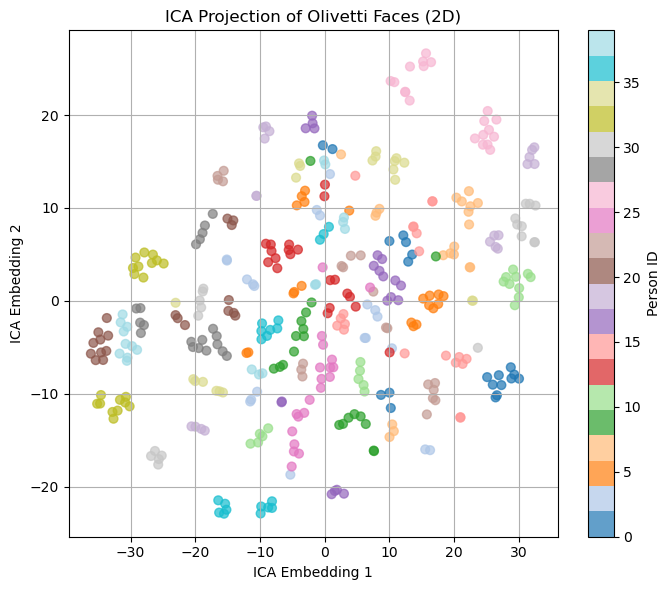

In [115]:
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='tab20', s=40, alpha=0.7)
plt.xlabel("ICA Embedding 1")
plt.ylabel("ICA Embedding 2")
plt.title("ICA Projection of Olivetti Faces (2D)")
plt.grid(True)
plt.colorbar(scatter, label="Person ID")
plt.tight_layout()
plt.show()

### MiniBatchKmeans

Technically KMeans is **not** a dimensionality reduction algorithm. However, we can use the centroids of our unsupervised algorithm to detect cluster centers.

In [126]:
from sklearn.cluster import MiniBatchKMeans

# Cluster into 40 clusters (matches number of people in Olivetti)
kmeans = MiniBatchKMeans(n_clusters=10,
    tol=1e-3,
    batch_size=20,
    max_iter=50,
    random_state=42
)

# Fit
kmeans.fit(X_train)

# predict on testing data
yhat = kmeans.predict(X_test)
# evaluate its accuracy
accuracy = accuracy_score(yhat, y_test)

print("Accuracy Score\n",accuracy)

Accuracy Score
 0.016666666666666666


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


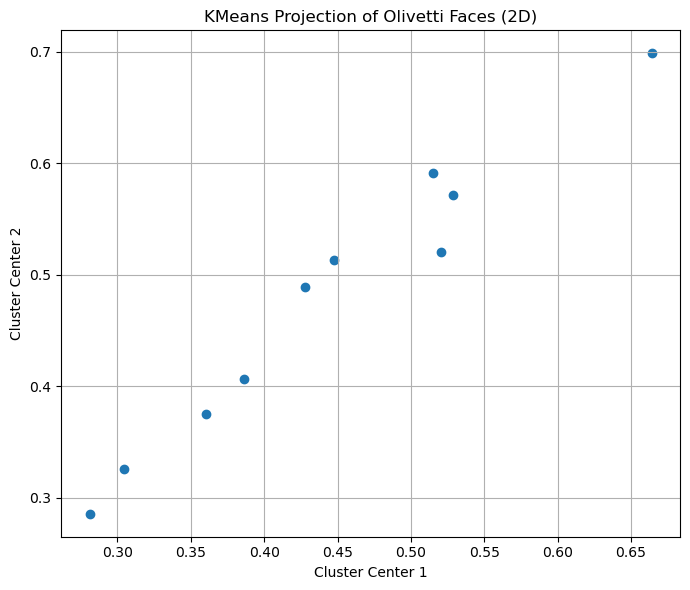

In [130]:
plt.figure(figsize=(7, 6))
scatter = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.xlabel("Cluster Center 1")
plt.ylabel("Cluster Center 2")
plt.title("KMeans Projection of Olivetti Faces (2D)")
plt.grid(True)
plt.tight_layout()
plt.show()